In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.mask

In [2]:
ls

2000.215.blue.filled.tif  Untitled.ipynb


In [3]:
ds = rasterio.open('2000.215.blue.filled.tif')

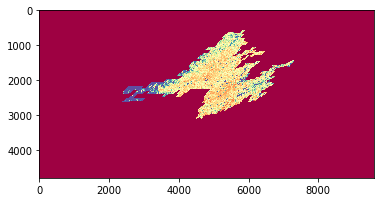

In [6]:
plt.imshow(ds.read().squeeze(), vmin=0, vmax=500, cmap='Spectral')

In [36]:
df = gpd.read_file('us_states/cb_2017_us_state_500k.shp')

In [8]:
df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,54,01779805,0400000US54,54,WV,West Virginia,00,62265662566,489840834,"POLYGON ((-82.6431981036679 38.1690897960737, ..."
1,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.512974 40.181062, -91.511073 40...."
2,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.05015299999999 37.986905, -76.0..."
3,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.242675 44.396548, -117.234835 4..."
4,50,01779802,0400000US50,50,VT,Vermont,00,23873457570,1031134839,"POLYGON ((-73.43773999999999 44.045006, -73.43..."


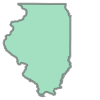

In [9]:
df.iloc[1].geometry

In [10]:
ds.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [11]:
df.crs

{'init': 'epsg:4269'}

In [12]:
df = df.to_crs(ds.crs)

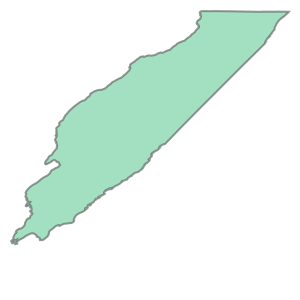

In [13]:
df.iloc[1].geometry

In [16]:
img_clip, trans = rasterio.mask.mask(ds, [df.iloc[1].geometry], crop=True)

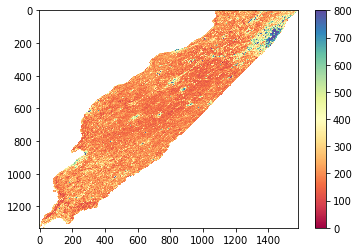

In [29]:
import numpy as np
img_clip = img_clip.astype('float32')
img_clip[img_clip == 0] = np.nan
plt.imshow(img_clip[0, :, :], vmin=0, vmax=800, cmap='Spectral')
plt.colorbar()

In [30]:
np.nanmean(img_clip)

227.54916

In [32]:
trans

Affine(463.3127165279165, 0.0, -7933303.645104517,
       0.0, -463.31271652750013, 4727179.646733083)

In [33]:
ds.transform

Affine(463.3127165279165, 0.0, -10007554.677,
       0.0, -463.31271652750013, 5559752.598333)

In [35]:
print(df.iloc[1].geometry.centroid)

POINT (-7591430.239540268 4452036.142501541)
